# Volume 3: Pandas 1 (Introduction)
    Patricia D. Bata
    BUDS Program
    August 8, 2019

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

## Problem 1
Read in the file *crime_data.csv* into a pandas object. The file contains data on types of crimes in the U.S. from 1960 to 2016. Set the index as the column *Year*.

Create a new column 'Rate' which has the crime rate for each year. Use this table to answer the following questions:

1) What is the mean crime rate? In what years was the crime rate above the mean?

2) On average, using the mean, what is the least common crime?

3) Identify two crimes which have close means. Do these two crimes have any kind of correlation from year to year? If so, what is this correlation?

1. The mean crime rate is **0.04237**. The years where the crime rate is above the mean are the **years 1974 to 1999 (26 years)**.
2. Using the mean, the least common crime is **"Murder"** with a **mean of 17289.404**.
3. The two crimes with the closest means are: **Aggravated Assault and Vehicle Theft**. There is a correlation with these two from year to year and this is equal to: **0.83675**. 

In [2]:
#Store the CSV file in x where the index was set to the column "Year"
x = pd.read_csv("crime_data.csv").set_index("Year")

#New column of Rate which is Total (crimes)/ Population
x['Rate'] = x['Total']/x['Population']

#Get the mean of the crime rates
ratemean = x.describe().loc['mean','Rate']
ratemean

0.04236939729496593

In [3]:
#DataFrame: Describe data per column
crime = (x.describe().loc['mean',"Murder":"Vehicle Theft"]).sort_values()
crime.head(1)

Murder    17289.403509
Name: mean, dtype: float64

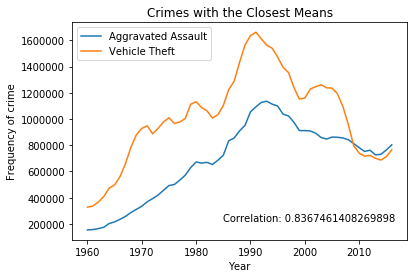

In [4]:
#DataFrame: Mean and Percent Difference between the different crime averages
diff = pd.DataFrame(crime)
diff["Percent Change"] = diff["mean"].pct_change()
cor = x["Aggravated Assault"].corr(x["Vehicle Theft"])

#Plot the crimes with the two closest years with the correlation
plt.plot(x.index,x["Aggravated Assault"]) #Specifies both domain and range
plt.plot(x.index,x["Vehicle Theft"])
plt.title("Crimes with the Closest Means")
plt.xlabel("Year")
plt.ylabel("Frequency of crime")
plt.legend(loc="upper left")
plt.annotate("Correlation: {}".format(cor), xy = (1985,220000))
plt.show()

### Problem 2
Answer the following questions using the pandas numerical methods. Support your answers with data from the file.

1) In what year did each crime hit an all-time high in the U.S.? In what year did the majority of crimes hit an all-time high?

2) Which decade had the greatest amount of total crime?

3) During this decade, which crime was commited most, and what percent of the total crime was it?

In [5]:
#Check the index where each column is max (Total Crime)
maxx = pd.DataFrame(x.max())
maxx['ID'] = x.idxmax()
maxx

,0,ID
Population,3.231275e+08,2016
Total,1.487290e+07,1991
Violent,1.932270e+06,1992
Property,1.296110e+07,1991
Murder,2.470000e+04,1991
Forcible Rape,1.090600e+05,1992
Robbery,6.877300e+05,1991
Aggravated Assault,1.135610e+06,1993
Burglary,3.795200e+06,1980
Larceny,8.142200e+06,1991


In [6]:
#Mode of the index of the all-time high of each crime
x.loc[:,"Murder":"Vehicle Theft"].idxmax().mode()
#Grouped years into decade and aggregated all columns using sum (y)
y = x.groupby((x.index//10)*10).sum().sort_values("Total", ascending = False)
maxdec = y.loc[:,"Total"].max()
print(maxdec)
print(y.idxmax())

136582146
Population            2000
Total                 1990
Violent               1990
Property              1990
Murder                1990
Forcible Rape         1990
Robbery               1990
Aggravated Assault    1990
Burglary              1980
Larceny               1990
Vehicle Theft         1990
Rate                  1980
dtype: int64


In [7]:
#Specific crime commited the most in highest crime decade
max90 = y.sort_values("Total", ascending = False).loc[:,"Murder":"Vehicle Theft"].head(n=1).max(axis=1)
per = max90/maxdec
print(max90, per)

Year
1990    77679366
dtype: int64 Year
1990    0.568737
dtype: float64


1. Crime reached an all-time high in the U.S. in **1991** with a total crime count of 14872900. Majority of the crimes also reached an all-time high in 1991, with 4/7 or **57% of the crimes being at an all-time high in 1991 (Murder, Robbery, Larceny, and Vehicle Theft)**.
2. The decade with the greatest amount of total crime is the **90s** with a total crime count of 136582146.
3. During the 1990s, the most commited crime was **Larceny** with a crime count of 77679366. This is **56.87%** of the total crime commited that decade.

## Problem 3
Using pandas commands, find the crime rates of the years where Property crimes were less than 90% of the total crime and burglary crimes were more than 20% of the total crime or property crimes were less than 90% of the total crime while violent crimes were more than 12% of the total crime.

In [8]:
pd.DataFrame(x[(x['Property'] < 0.9*x['Total']) & ((x['Burglary'] > 0.2*x['Total'])|(x['Violent'] > 0.12*x['Total']))]['Rate'])

,Rate
Year,
1972,0.039614
1973,0.041544
1980,0.059500
1981,0.058582
1982,0.056037
1983,0.051750
1984,0.050313
1985,0.052071
1986,0.055019


## Problem 4
Read in the files *final_accidents2.pickle* and *final_drivers.pickle* using the function *read_pickle()*.  
The accidents file contains data on various accidents that occurred in the U.S. and their causes.
The drivers data has data on various tickets given to drivers, how many tickets given, and what the ticket is for.

Create a dataframe containing case number, age, and fatalities using an inner join operation on the Case Number. In this dataframe, also include the speed column from each dataframe.
Create a second dataframe using an outer join.

Use these dataframe to answer the following questions. Make sure to support your claims with appropriate and presentable data.

1. What is the most common kind of weather involved with accidents?

2. How many accidents involved speeding?

3. What is the most common type of speeding in accidents?

4. Rounding to the nearest integer, what is the mean number of drunk drivers involved in each accident?

5. What is the mean number of fatalities per accident each year?

6. What month has the most fatalities each year?

1. The most common kind of weather involved with accidents is **CLEAR**.
2. There were **63112** acidents where speeding was involved.
3. The most common type of speeding is: **Too Fast for Conditions**.
4. The mean number of drunk drivers per incident is **0**.
5. The mean number of fatalities per accident is about **1**.
6. The month with the most fatailities is the 8th, or **August**.

In [9]:
a = pd.read_pickle("final_accidents2.pickle")
b = pd.read_pickle("final_drivers.pickle")
#DataFrame merge using inner join containing: Case Number, Age, Drunk_Driver, DUIs, Fatal Accident.
inner = pd.merge(a, b, on = ["ST_CASE","YEAR"])[['ST_CASE','AGE','DRINKING','FATALS','SP','SPEEDREL']]
#DataFrame merge using outer join 
outer = pd.merge(a, b, on = ["ST_CASE","YEAR"], how = 'outer')

#Most common weather
outer.groupby(['ST_CASE','YEAR']).WEATHER.max().mode()

0    1.0
dtype: float64

In [10]:
#How many accidents involve speeding (no value in "SP" column > 1)
pd.DataFrame(outer.groupby(['ST_CASE','YEAR']).SP.max().value_counts())

,SP
0.0,104373
1.0,43833


In [11]:
#Most common type of speeding in accidents
outer.groupby(['ST_CASE','YEAR']).SPEEDREL.max().value_counts()

0.0    99273
1.0    27637
4.0     7785
9.0     7131
3.0     6812
5.0     2171
2.0      135
Name: SPEEDREL, dtype: int64

In [12]:
#Mean number of drunk drivers in each accident
int(outer.groupby(['ST_CASE','YEAR']).DRUNK_DR.sum().mean())

0

In [13]:
#Mean number of fatalities per accident each year?
int(outer.groupby(['ST_CASE','YEAR']).FATALS.max().mean())

1

In [14]:
#Month which has the most fatalities each year
outer.groupby('MONTH').sum().FATALS.sort_values(ascending = False).head(1)

MONTH
8.0    22876.0
Name: FATALS, dtype: float64

In [15]:
#How many accidents involve speeding (no value in "SP" column > 1)
inner.loc[:,"SP"].sum()
#Most common type of speeding in accidents
inner.loc[:,"SPEEDREL"].value_counts()
#Mean number of fatalities per accident each year?
inner.loc[:,"FATALS"].mean()
#Month which has the most fatalities each year
pd.DataFrame(outer.groupby(['YEAR','MONTH']).sum().FATALS.sort_values(ascending = False))
outer.groupby(['ST_CASE','YEAR']).FATALS.max()

ST_CASE  YEAR
10001    2010    1.0
         2011    1.0
         2012    1.0
         2013    2.0
         2014    1.0
10002    2010    1.0
         2011    1.0
         2012    1.0
         2013    1.0
         2014    1.0
10003    2010    1.0
         2011    2.0
         2012    1.0
         2013    1.0
         2014    2.0
10004    2010    1.0
         2012    1.0
         2013    2.0
         2014    1.0
10005    2010    1.0
         2011    1.0
         2012    1.0
         2013    1.0
         2014    1.0
10006    2010    1.0
         2011    1.0
         2012    1.0
         2013    1.0
         2014    1.0
10007    2010    2.0
                ... 
560121   2011    NaN
         2014    1.0
560122   2010    1.0
         2014    1.0
560123   2010    1.0
         2014    3.0
560124   2010    1.0
         2014    1.0
560125   2010    1.0
         2014    1.0
560126   2010    1.0
         2014    1.0
560127   2010    1.0
         2014    1.0
560128   2010    1.0
         2014    1.0

In [16]:
outer.loc[:,["ST_CASE","YEAR","FATALS","MONTH"]].groupby(['ST_CASE','YEAR']).max()

FATALS  MONTH
ST_CASE YEAR               
10001   2010     1.0    1.0
        2011     1.0    1.0
        2012     1.0    1.0
        2013     2.0    1.0
        2014     1.0    1.0
10002   2010     1.0    1.0
        2011     1.0    1.0
        2012     1.0    1.0
        2013     1.0    1.0
        2014     1.0    1.0
10003   2010     1.0    1.0
        2011     2.0    1.0
        2012     1.0    1.0
        2013     1.0    1.0
        2014     2.0    1.0
10004   2010     1.0    1.0
        2012     1.0    1.0
        2013     2.0    1.0
        2014     1.0    1.0
10005   2010     1.0    1.0
        2011     1.0    1.0
        2012     1.0    1.0
        2013     1.0    1.0
        2014     1.0    1.0
10006   2010     1.0    1.0
        2011     1.0    1.0
        2012     1.0    1.0
        2013     1.0    1.0
        2014     1.0    1.0
10007   2010     2.0    1.0
...              ...    ...
560121  2011     NaN    NaN
        2014     1.0   11.0
560122  2010     1.0   11.0
        2014     1.0   11.0
560123  2010     1.0   11.0
        2014     3.0   11.0
560124  2010     1.0   11.0
        2014     1.0   11.0
560125  2010     1.0   11.0
        2014     1.0   11.0
560126  2010     1.0   12.0
        2014     1.0   11.0
560127  2010     1.0   12.0
        2014     1.0   12.0
560128  2010     1.0   12.0
        2014     1.0   12.0
560129  2010     1.0   12.0
        2014     1.0   12.0
560130  2010     1.0   12.0
        2014     1.0   12.0
560131  2010     1.0   12.0
        2014     1.0   12.0
560132  2010     1.0   12.0
560133  2010     1.0   12.0
560134  2010     1.0   12.0
560135  2010     1.0    2.0
560136  2010     1.0    5.0
560137  2010     1.0   10.0
560138  2010     NaN    NaN
560139  2010     NaN    NaN

[151284 rows x 2 columns]